In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import py_files.custom_functions as func

In [2]:
df = pd.read_csv('data/transfers_and_stats_merged.csv')

In [3]:
df.head()

,Unnamed: 0,player,age_x,nationality,position,selling_club,previous_league,est_market_value,fee,buying_club,...,carry_progressive_distance,pass_targets,passes_received,miscontrols,dispossessed,passes_left_foot,passes_right_foot,aerials_won,aerials_lost,mins_num
0,0,Christian Pulisic,20,United States,Left Winger,Borussia Dortmund,Germany,£45.00m,£57.60m,Chelsea FC,...,5699.0,1301.0,971.0,76.0,90.0,167.0,649.0,12.0,45.0,2302
1,1,Dominic Solanke,21,England,Centre-Forward,Liverpool FC,England,£9.00m,£19.08m,AFC Bournemouth,...,657.0,397.0,238.0,32.0,13.0,22.0,141.0,9.0,14.0,596
2,2,Emiliano Sala,28,Argentina,Centre-Forward,FC Nantes,France,£14.40m,£15.30m,Cardiff City,...,1870.0,1695.0,977.0,121.0,79.0,47.0,572.0,41.0,77.0,3032
3,3,Riyad Mahrez,27,Algeria,Right Winger,Leicester City,England,£45.00m,£61.02m,Manchester City,...,6616.0,1585.0,1279.0,83.0,87.0,1184.0,129.0,15.0,25.0,2950
4,4,Lee Grant,35,England,Goalkeeper,Stoke City,England,£900Th.,£1.53m,Manchester United,...,115.0,31.0,30.0,0.0,0.0,5.0,52.0,0.0,0.0,270


In [4]:
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

### Distribution of fee

In [5]:
df['fee_final'].describe()

count    6.780000e+02
mean     1.194474e+07
std      1.480647e+07
min      9.000000e+01
25%      2.700000e+06
50%      7.200000e+06
75%      1.620000e+07
max      1.305000e+08
Name: fee_final, dtype: float64

In [49]:
df.loc[df['fee_final']>35000000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 672
Columns: 129 entries, player to Nat_cat
dtypes: float64(86), int64(29), object(14)
memory usage: 40.6+ KB


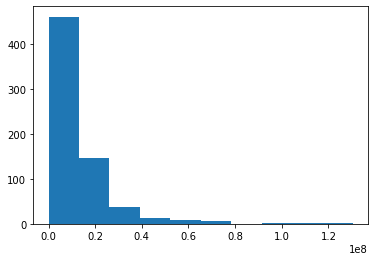

In [6]:
plt.hist(df['fee_final']);

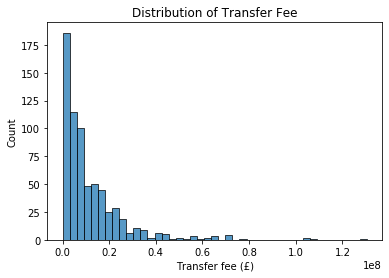

In [7]:
ax = sns.histplot(data=df, x='fee_final')
ax.set_title('Distribution of Transfer Fee')
ax.set_xlabel('Transfer fee (£)');
plt.savefig('images/dist_trans_fee.png')

In [8]:
#distribution is clearly non-normal.  Logging and reassessing the shape.
df['fee_final_logged'] = np.log(df['fee_final'])

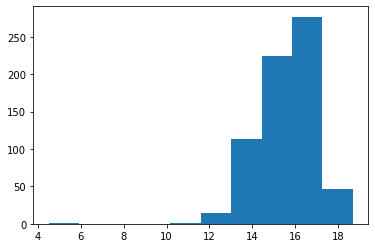

In [9]:
plt.hist(df['fee_final_logged']);

* shape of distribution is much improved but appear to be outliers at the low end

In [10]:
df['fee_final_logged'].describe()

count    678.000000
mean      15.646404
std        1.295222
min        4.499810
25%       14.808762
50%       15.789592
75%       16.600522
max       18.686884
Name: fee_final_logged, dtype: float64

In [11]:
df.loc[df['fee_final_logged'] < 13, :]

,player,age_x,nationality,position,selling_club,previous_league,est_market_value,fee,buying_club,window,...,pass_targets,passes_received,miscontrols,dispossessed,passes_left_foot,passes_right_foot,aerials_won,aerials_lost,mins_num,fee_final_logged
150,Rene Krhin,28,Slovenia,Central Midfield,Granada CF,Spain,£1.35m,£270Th.,FC Nantes,s_w=s,...,396.0,351.0,8.0,6.0,24.0,405.0,16.0,16.0,1313,12.506177
218,Isaac Lihadji,18,France,Right Winger,Olympique de Marseille B,France,£2.88m,£270Th.,LOSC Lille,s_w=s,...,23.0,17.0,1.0,2.0,11.0,1.0,1.0,2.0,25,12.506177
242,Baptiste Reynet,29,France,Goalkeeper,FC Toulouse,France,£2.16m,£315Th.,Nîmes Olympique,s_w=s,...,354.0,353.0,0.0,1.0,73.0,626.0,1.0,0.0,2035,12.660328
330,Nacho Monreal,33,Spain,Left-Back,Arsenal FC,England,£7.20m,£225Th.,Real Sociedad,s_w=s,...,1045.0,988.0,9.0,5.0,961.0,128.0,25.0,27.0,1861,12.323856
353,Facundo Roncaglia,32,Argentina,Right-Back,Celta de Vigo,Spain,£2.25m,£225Th.,CA Osasuna,s_w=s,...,616.0,600.0,5.0,3.0,86.0,655.0,25.0,20.0,1671,12.323856
370,Raúl Navas,32,Spain,Centre-Back,Real Sociedad,Spain,£1.08m,£225Th.,CA Osasuna,s_w=s,...,150.0,148.0,5.0,2.0,61.0,179.0,13.0,10.0,711,12.323856
421,Philipp Tschauner,33,Germany,Goalkeeper,Hannover 96,Germany,£360Th.,£315Th.,RB Leipzig,s_w=s,...,11.0,11.0,0.0,0.0,1.0,23.0,0.0,0.0,90,12.660328
466,Valter Birsa,32,Slovenia,Attacking Midfield,Chievo Verona,Italy,£2.70m,£270Th.,Cagliari Calcio,s_w=w,...,1466.0,1242.0,48.0,57.0,1031.0,381.0,25.0,45.0,2504,12.506177
469,Marco Sau,31,Italy,Centre-Forward,Cagliari Calcio,Italy,£810Th.,£90Th.,UC Sampdoria,s_w=w,...,640.0,397.0,39.0,38.0,44.0,305.0,6.0,22.0,1311,11.407565
515,Vid Belec,28,Slovenia,Goalkeeper,Benevento Calcio,Italy,£1.53m,£270Th.,UC Sampdoria,s_w=s,...,168.0,166.0,0.0,0.0,40.0,312.0,0.0,0.0,1293,12.506177


These fees are all realistic except for Andrea Masiello to Genoa.  Wiki reports it as 1.08m euros (approx 980,000 pounds).  Resetting manually.

In [12]:
df.loc[df['player']=='Andrea Masiello', 'fee_final'] = 980000
df.loc[df['player']=='Andrea Masiello', 'fee_final_logged'] = 13.795

In [13]:
df['fee_final_logged'].describe()

count    678.000000
mean      15.660113
std        1.224316
min       11.407565
25%       14.808762
50%       15.789592
75%       16.600522
max       18.686884
Name: fee_final_logged, dtype: float64

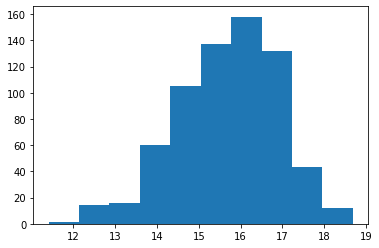

In [14]:
plt.hist(df['fee_final_logged']);

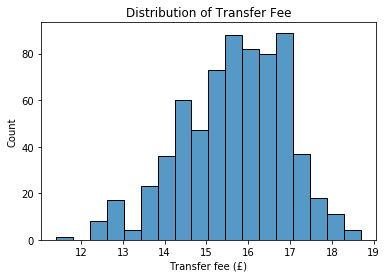

In [15]:
ax = sns.histplot(data=df, x='fee_final_logged')
ax.set_title('Distribution of Transfer Fee')
ax.set_xlabel('Transfer fee (£)');
# plt.savefig('images/dist_trans_fee.png')

* proceed with logged fee as target

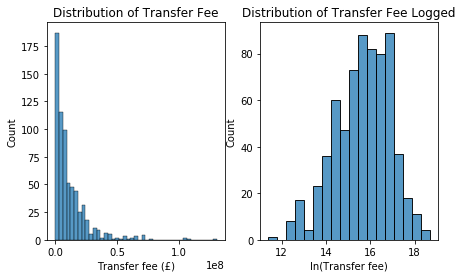

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(7,4))
sns.histplot(ax=axes[0], data=df, x='fee_final')
sns.histplot(ax=axes[1], data=df, x='fee_final_logged')

axes[0].set_title('Distribution of Transfer Fee')
axes[0].set_xlabel('Transfer fee (£)');

axes[1].set_title('Distribution of Transfer Fee Logged')
axes[1].set_xlabel('ln(Transfer fee)');
plt.savefig('images/transfer_fee_dist_unlogged_and_logged.png')

## Position

In [17]:
df['position'].value_counts()

Centre-Back           111
Centre-Forward        110
Central Midfield       94
Defensive Midfield     57
Right-Back             56
Left Winger            53
Right Winger           52
Goalkeeper             47
Left-Back              45
Attacking Midfield     31
Second Striker         10
Left Midfield           8
Right Midfield          4
Name: position, dtype: int64

In [18]:
# df.loc[df['position']=='Second Striker']

In [19]:
#Only 4 observations labeled as right midfield.  Upon examination these are more appropriate labels
df.loc[df['player'] == 'Manuel Lazzari', 'position'] = 'Right-Back'
df.loc[df['player'] == 'Achraf Hakimi', 'position'] = 'Right-Back'
df.loc[df['player'] == 'Lorenzo Dickmann', 'position'] = 'Right-Back'

df.loc[df['player'] == 'Valentino Lazaro', 'position'] = 'Attacking Midfield'

#Only 8 observations labeled as right midfield.  Upon examination these are more appropriate labels
df.loc[df['player'] == 'Marc Cucurella', 'position'] = 'Left-Back'
df.loc[df['player'] == 'Ashley Young', 'position'] = 'Left-Back'
df.loc[df['player'] == 'Luca Pellegrini', 'position'] = 'Left-Back'
df.loc[df['player'] == 'Mohamed Fares', 'position'] = 'Left-Back'
df.loc[df['player'] == 'Steven Zuber', 'position'] = 'Left-Back' #very versatile but since I grouped wingbacks here makes most sense

#Recategorizing the 10 second-strikers:
df.loc[df['player'] == 'Ayoze Pérez', 'position'] = 'Right Winger'
df.loc[df['player'] == 'Antoine Griezmann', 'position'] = 'Centre-Forward'
df.loc[df['player'] == 'Marcos Llorente', 'position'] = 'Central Midfield'
df.loc[df['player'] == 'Yuya Osako', 'position'] = 'Attacking Midfield'
df.loc[df['player'] == 'Luca Waldschmidt', 'position'] = 'Attacking Midfield'
df.loc[df['player'] == 'Matheus Cunha', 'position'] = 'Left Winger'
df.loc[df['player'] == 'Joaquín Correa', 'position'] = 'Attacking Midfield'
df.loc[df['player'] == 'Enrico Brignola', 'position'] = 'Attacking Midfield'
df.loc[df['player'] == 'Maximilian Philipp', 'position'] = 'Attacking Midfield'

In [20]:
gk = df.loc[df['position'] == 'Goalkeeper', :]

In [21]:
gk['fee_final'].describe()

count    4.700000e+01
mean     1.080532e+07
std      1.430589e+07
min      2.700000e+05
25%      1.755000e+06
50%      6.300000e+06
75%      1.458000e+07
max      7.200000e+07
Name: fee_final, dtype: float64

In [22]:
#Goalkeeping is inherently different and based on different statistics remove from analysis
filter = df['position'] == 'Goalkeeper'
df.drop(index=df[filter].index, inplace=True)

In [23]:
df['position'].value_counts()

Centre-Forward        111
Centre-Back           111
Central Midfield       95
Right-Back             59
Defensive Midfield     57
Left Winger            54
Left-Back              53
Right Winger           53
Attacking Midfield     38
Name: position, dtype: int64

In [24]:
CF = df.loc[df['position']=='Centre-Forward', 'fee_final']
CB = df.loc[df['position']=='Centre-Back', 'fee_final']
CM = df.loc[df['position']=='Central Midfield', 'fee_final']
RB = df.loc[df['position']=='Right-Back', 'fee_final']
DM = df.loc[df['position']=='Defensive Midfield', 'fee_final']
LW = df.loc[df['position']=='Left Winger', 'fee_final']
LB = df.loc[df['position']=='Left-Back', 'fee_final']
RW = df.loc[df['position']=='Right Winger', 'fee_final']
AM = df.loc[df['position']=='Attacking Midfield', 'fee_final']

In [25]:
df.groupby(['position'])['fee_final'].mean()

position
Attacking Midfield    1.242132e+07
Central Midfield      1.081095e+07
Centre-Back           1.029711e+07
Centre-Forward        1.322644e+07
Defensive Midfield    1.175667e+07
Left Winger           1.755009e+07
Left-Back             1.085368e+07
Right Winger          1.289264e+07
Right-Back            1.025608e+07
Name: fee_final, dtype: float64

In [26]:
sp.f_oneway(CF,CB,CM,RB,DM,LW,LB,RW,AM)

F_onewayResult(statistic=1.475593694779513, pvalue=0.162694256297585)

In [27]:
#Creating a grouped position feature
df.loc[df['position']=='Centre-Forward', 'position_agg'] = 'attacker'
df.loc[df['position']=='Centre-Back', 'position_agg'] ='defender'
df.loc[df['position']=='Central Midfield', 'position_agg'] = 'midfielder'
df.loc[df['position']=='Right-Back', 'position_agg']  ='defender'
df.loc[df['position']=='Defensive Midfield', 'position_agg'] = 'midfielder'
df.loc[df['position']=='Left Winger', 'position_agg'] = 'attacker'
df.loc[df['position']=='Left-Back', 'position_agg']  ='defender'
df.loc[df['position']=='Right Winger', 'position_agg'] = 'attacker'
df.loc[df['position']=='Attacking Midfield', 'position_agg'] = 'attacker'

In [28]:
df.groupby(['position_agg'])['fee_final'].mean()

position_agg
attacker      1.394984e+07
defender      1.041853e+07
midfielder    1.116559e+07
Name: fee_final, dtype: float64

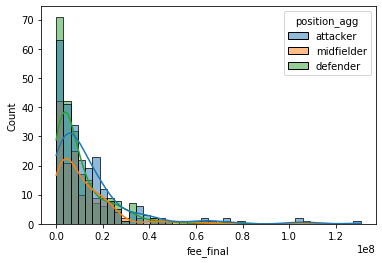

In [29]:
sns.histplot(data=df, x='fee_final', kde=True, hue='position_agg')

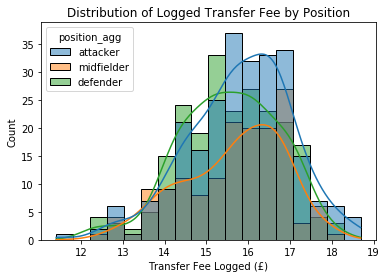

In [30]:
ax = sns.histplot(data=df, x='fee_final_logged', kde=True, hue='position_agg')
ax.set_title('Distribution of Logged Transfer Fee by Position')
ax.set_xlabel('Transfer Fee Logged (£)');
plt.savefig('images/dist_trans_fee_by_position.png')
# ax.legend(label = 'position_agg',title = 'position')

* Players are bought for specific roles in a team and position is thought of and discussed in granular detail (more than even the categories included in 'position' - no wing-back category, no second striker) so for recommendation it is important to match position.  
* But also, many instances of versatile players bought because they are versatile.
* Aggregated positions seems like a fair way to group people to then compare subsets of stats (e.g., shooting, sca among attackers)
* As expected attackers go for the most on average but looks like a decent spread for each subset of players.

## Age

In [31]:
df['age_x'].value_counts()

25    73
24    66
23    65
26    58
22    56
27    54
21    51
28    50
29    34
30    30
31    23
19    21
20    19
32    16
33     6
18     3
34     3
36     1
35     1
16     1
Name: age_x, dtype: int64

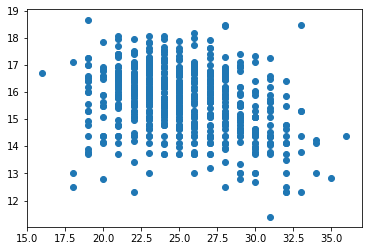

In [32]:
plt.scatter(x='age_x',y='fee_final_logged',data=df);

Not a strong linear relationship.  Almost certainly modified by performance

## Nationality

In [33]:
df['nationality'].value_counts()

France               108
Spain                 90
Italy                 78
Germany               47
Brazil                30
                    ... 
Egypt                  1
Scotland               1
Ecuador                1
Equatorial Guinea      1
Australia              1
Name: nationality, Length: 65, dtype: int64

In [34]:
df['French'] = df['nationality'].map(lambda x: 1 if x == 'France' else 0)
df['Spain'] = df['nationality'].map(lambda x: 1 if x == 'Spain' else 0)
df['Italy'] = df['nationality'].map(lambda x: 1 if x == 'Italy' else 0)
df['Germany'] = df['nationality'].map(lambda x: 1 if x == 'Germany' else 0)
df['Brazil'] = df['nationality'].map(lambda x: 1 if x == 'Brazil' else 0)
df['England'] = df['nationality'].map(lambda x: 1 if x == 'England' else 0)
df['Argentina'] = df['nationality'].map(lambda x: 1 if x == 'Argentina' else 0)

Other_european = ['Portugal', 'Belgium', 'Denmark', 'Netherlands','Switzerland', 'Turkey', 
                  'Sweden','Austria','Poland', 'Romania', 'Slovenia', 'Czech Republic', 'Ireland', 
                  'Northern Ireland', 'Iceland','Croatia', 'Serbia', 'Slovakia', 'Greece',
                  'Kosovo', 'Russia', 'Scotland', 'Ukraine', 'Estonia']
Other_south_america = ['Colombia', 'Uruguay', 'Chile', 'Venezuela', 'Peru', 'Ecuador']
Concacaf = ['United States', 'Costa Rica', 'Martinique' ,'Guadeloupe', 'Mexico']
oceanian = ['Japan' ,'Australia' ]
CAF = ['Morocco', 'Senegal', "Cote d'Ivoire", 'Algeria' ,'Ghana', 'Nigeria', 'DR Congo', 
       'Cameroon','Tunisia' ,'Mali', 'Guinea', 'Chad' ,'Togo', 'Burkina Faso' ,'South Africa',
      'Central African Republic', 'Gabon' ,'Congo', 'Egypt', 'Angola', 'Equatorial Guinea']

df['other_euro'] = df['nationality'].map(lambda x: 1 if x in Other_european else 0)
df['other_SA'] = df['nationality'].map(lambda x: 1 if x in Other_south_america else 0)
df['Concacaf'] = df['nationality'].map(lambda x: 1 if x in Concacaf else 0)
df['oceanian'] = df['nationality'].map(lambda x: 1 if x in oceanian else 0)
df['CAF'] = df['nationality'].map(lambda x: 1 if x in CAF else 0)

In [35]:
df.loc[df['nationality']=='France', 'Nat_cat'] = 1
df.loc[df['nationality']=='Spain', 'Nat_cat'] = 2
df.loc[df['nationality']=='Italy', 'Nat_cat'] = 3
df.loc[df['nationality']=='Germany', 'Nat_cat'] = 4
df.loc[df['nationality']=='Brazil', 'Nat_cat'] = 5
df.loc[df['nationality']=='England', 'Nat_cat'] = 6
df.loc[df['nationality']=='Argentina', 'Nat_cat'] = 7
df.loc[df['other_euro']==1, 'Nat_cat'] = 8
df.loc[df['other_SA']==1, 'Nat_cat'] = 9
df.loc[df['Concacaf']==1, 'Nat_cat'] = 10
df.loc[df['oceanian']==1, 'Nat_cat'] = 11
df.loc[df['CAF']==1, 'Nat_cat'] = 12

In [36]:
France = df.loc[df['Nat_cat']==1, 'fee_final']
Spain = df.loc[df['Nat_cat']==2, 'fee_final']
Italy = df.loc[df['Nat_cat']==3, 'fee_final']
Germany = df.loc[df['Nat_cat']==4, 'fee_final']
Brazil = df.loc[df['Nat_cat']==5, 'fee_final']
England = df.loc[df['Nat_cat']==6, 'fee_final']
Argentina = df.loc[df['Nat_cat']==7, 'fee_final']
other_euro = df.loc[df['Nat_cat']==8, 'fee_final']
other_sa = df.loc[df['Nat_cat']==9, 'fee_final']
concacaf = df.loc[df['Nat_cat']==10, 'fee_final']
oceanian = df.loc[df['Nat_cat']==11, 'fee_final']
caf = df.loc[df['Nat_cat']==12, 'fee_final']

In [37]:
df.groupby(['Nat_cat'])['fee_final'].mean()

Nat_cat
1.0     1.222999e+07
2.0     9.693222e+06
3.0     9.120962e+06
4.0     1.228511e+07
5.0     1.914280e+07
6.0     1.968476e+07
7.0     1.323475e+07
8.0     1.410584e+07
9.0     1.111037e+07
10.0    1.404714e+07
11.0    3.217500e+06
12.0    1.018190e+07
Name: fee_final, dtype: float64

In [38]:
sp.f_oneway(France, Spain, Italy, Germany, Brazil, England, Argentina, other_euro, other_sa, concacaf, oceanian, caf)

F_onewayResult(statistic=2.133055769289057, pvalue=0.01658072024538401)

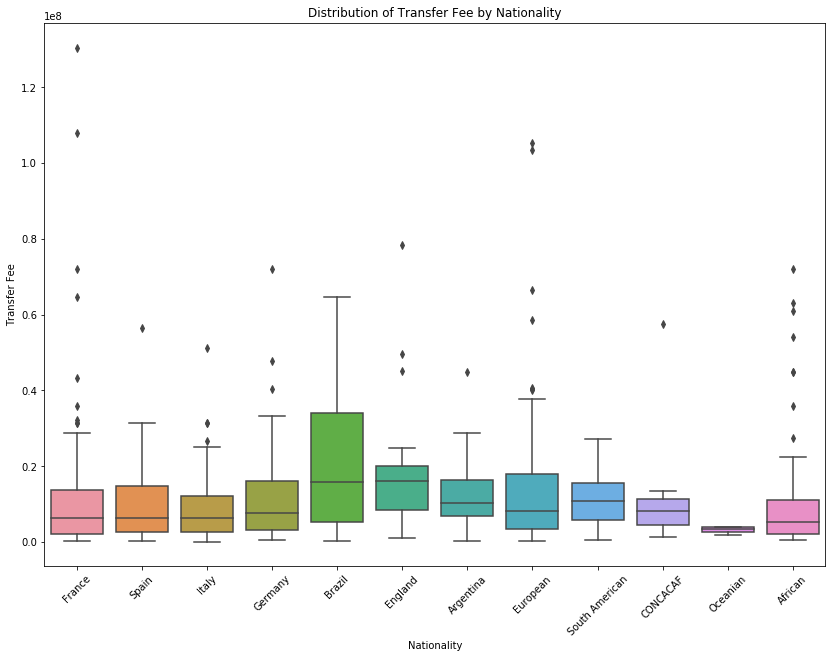

In [45]:
fig, ax = plt.subplots(1,1, figsize = (14,10))

ax = sns.boxplot(data=df, x='Nat_cat', y='fee_final')
ax.set_xticklabels(['France','Spain','Italy', 'Germany', 'Brazil','England','Argentina',
              'European', 'South American','CONCACAF', 'Oceanian', 'African'],
                  rotation=45)
ax.set_xlabel('Nationality')
ax.set_ylabel('Transfer Fee')
ax.set_title('Distribution of Transfer Fee by Nationality')
plt.savefig('images/dist_trans_fee_by_nationality.png')

Significatly different.
Following conventional wisdom: Brazilians and English players the most expensive. Oceanian was the lowest mean.

Even though there are foreign player limits these are transfers of players between clubs in the top 5 leagues in europe so not like the prices are dragged down by transfers to lower tier clubs.

## Previous league

In [74]:
df.groupby(['previous_league'])['fee_final'].mean()

previous_league
England    1.418126e+07
France     1.103815e+07
Germany    1.221825e+07
Italy      1.015377e+07
Spain      1.369984e+07
Name: fee_final, dtype: float64

In [75]:
prem = df.loc[df['previous_league']=='England', 'fee_final'] 
L1 = df.loc[df['previous_league']=='France', 'fee_final'] 
bund = df.loc[df['previous_league']=='Germany', 'fee_final'] 
seriea = df.loc[df['previous_league']=='Italy', 'fee_final'] 
liga = df.loc[df['previous_league']=='Spain', 'fee_final'] 

In [76]:
sp.f_oneway(prem, L1, bund, seriea, liga)

F_onewayResult(statistic=1.727951448812687, pvalue=0.14209780898285143)

No statistically significant difference in mean fee by league

## Mega club indicator for buying and selling
* The big clubs claim they are exploited when selling
* Also a phenomenon of players are mega clubs not performaning well, being sold and being sold for their potential/earlier performances rather than what they did at that club in that year.

In [77]:
pd.options.display.max_rows = 135
df['selling_club'].value_counts()

FC Barcelona                17
AS Monaco                   16
LOSC Lille                  14
Olympique Lyon              13
Juventus FC                 13
US Sassuolo                 12
SSC Napoli                  12
Borussia Dortmund           11
AC Milan                    10
Real Madrid                 10
Udinese Calcio               9
Valencia CF                  9
AS Roma                      9
Villarreal CF                9
Bayern Munich                8
Atalanta BC                  8
Genoa CFC                    8
TSG 1899 Hoffenheim          8
FC Girondins Bordeaux        8
Inter Milan                  8
Chievo Verona                8
RB Leipzig                   7
Manchester City              7
Atlético Madrid              7
Real Betis Balompié          7
OGC Nice                     7
ACF Fiorentina               7
Bologna FC 1909              7
Hannover 96                  7
SD Eibar                     7
Sevilla FC                   7
Watford FC                   7
AS Saint

In [78]:
# choosing to exclude Dortmund and Athletico but include Arsenal and United because of 
# their relative finacial limitations and this indicator is about paying/getting a premium 
# because you have the money
# Milan, Inter, Napoli, Roma, Everton, Tottenham, and Lyon are large but second tier clubs

mega_club = ['FC Barcelona', 'Juventus FC','Real Madrid','Bayern Munich',
             'Paris Saint-Germain','Manchester City','Chelsea FC','Manchester United',
            'Arsenal FC','Liverpool FC']

In [79]:
df['selling_club_mega'] = df['selling_club'].apply(lambda x: 1 if x in mega_club else 0)
df['buying_club_mega'] = df['buying_club'].apply(lambda x: 1 if x in mega_club else 0)

In [80]:
print(df['selling_club_mega'].value_counts())
print(df['buying_club_mega'].value_counts())

0    549
1     82
Name: selling_club_mega, dtype: int64
0    575
1     56
Name: buying_club_mega, dtype: int64


In [81]:
df.groupby(['selling_club_mega'])['fee_final'].mean()

selling_club_mega
0    1.105070e+07
1    1.859549e+07
Name: fee_final, dtype: float64

In [82]:
df.groupby(['buying_club_mega'])['fee_final'].mean()

buying_club_mega
0    9.326231e+06
1    3.980500e+07
Name: fee_final, dtype: float64

* Indicator for selling will explain cases like Malcolm or Denis Suarez etc
    - Might consider indicator for selling from a large club but will include sales from large to mega also
* Difference in mean for buying is expected as these clubs go after the premium talent.  Probably less utility 

## Assessing relationship of raw stats with transfer fee
* By raw I mean counts rather than percentages or rate per 90
* Using a custom function in py_file 'mean_by_pos' that takes as an argument a df and statistics and returns the overall correlation with logged fee, the correlation with logged fee by aggregate position and a scatterplot hued by position

## Key offensive stats
* Theoretically most important variables:
    - 'goals' and 'xg'
    - 'assists' and 'xa'
    - total 'sca' (shot creating action) and 'gca' (goal creation action)

overall correlation of goals with fee: r=0.318, p=0.0
correlation of goals with fee for attackers: r=0.412, p=0.0
correlation of goals with fee for midfielders : r=0.309, p=0.0
correlation of goals with fee for defenders: r=0.188, p=0.005


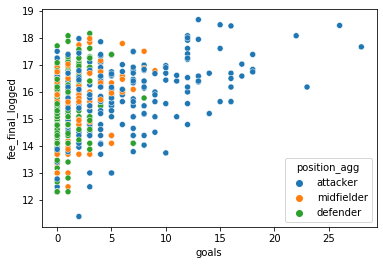

In [83]:
func.mean_by_pos(df, 'goals')

overall correlation of xg with fee: r=0.326, p=0.0
correlation of xg with fee for attackers: r=0.431, p=0.0
correlation of xg with fee for midfielders : r=0.319, p=0.0
correlation of xg with fee for defenders: r=0.227, p=0.001


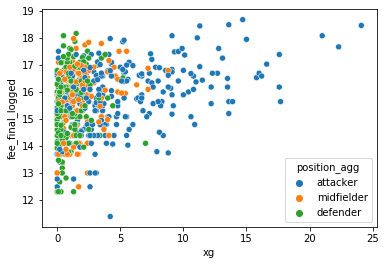

In [84]:
func.mean_by_pos(df,'xg')

overall correlation of assists with fee: r=0.271, p=0.0
correlation of assists with fee for attackers: r=0.336, p=0.0
correlation of assists with fee for midfielders : r=0.202, p=0.012
correlation of assists with fee for defenders: r=0.164, p=0.014


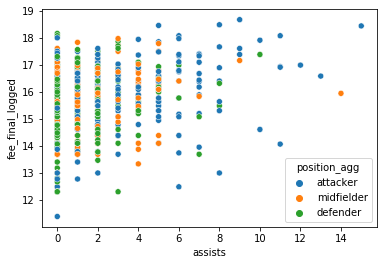

In [85]:
func.mean_by_pos(df,'assists')

overall correlation of xa with fee: r=0.316, p=0.0
correlation of xa with fee for attackers: r=0.404, p=0.0
correlation of xa with fee for midfielders : r=0.256, p=0.001
correlation of xa with fee for defenders: r=0.177, p=0.008


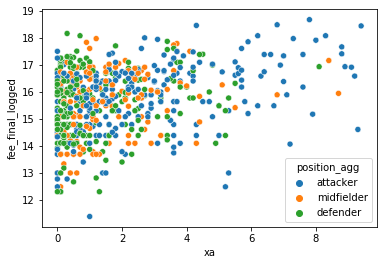

In [86]:
func.mean_by_pos(df,'xa')

## Impressions:
* The relationship between logged fee and goals/xg is very similar
* xa has a stronger relationship with fee than assists for forwards and midfielders
* As expected, most important for attackers, then midfielders, then defenders

overall correlation of sca with fee: r=0.325, p=0.0
correlation of sca with fee for attackers: r=0.365, p=0.0
correlation of sca with fee for midfielders : r=0.358, p=0.0
correlation of sca with fee for defenders: r=0.2, p=0.003


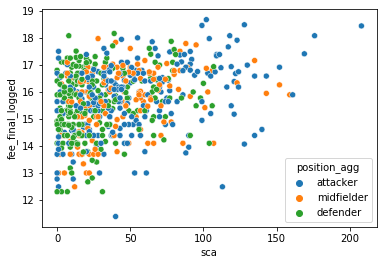

In [87]:
func.mean_by_pos(df,'sca')

overall correlation of gca with fee: r=0.354, p=0.0
correlation of gca with fee for attackers: r=0.426, p=0.0
correlation of gca with fee for midfielders : r=0.391, p=0.0
correlation of gca with fee for defenders: r=0.179, p=0.007


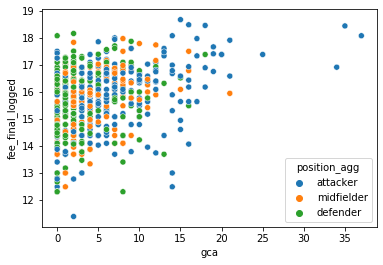

In [88]:
func.mean_by_pos(df,'gca')

## Impression:
* SCA for midfielders has high correlation with fee, almost the same as for attackers.  Even though attacking mids are grouped with attackers clubs are paying a premium for creativity from other positions.
* Magnitude of correlations for gca are stonger than goals for attackers and midfielers

## Key defensive stats 
* https://bleacherreport.com/articles/1722602-which-stats-are-most-important-for-measuring-defenders
* Primary 
    - 'clearances', - not further defined
    - blocks - blocking ball by being in path
    - 'interceptions', - not further defined
* Secondary
    - pressures - number of times pressures oppossing player receiving ball
    - pressure_regains - number of times regained ball within 5 seconds of pressure
    - 'aerials_won',
    - 'aerials_lost'
    - tackles - number of players tackled
    - tackles_won - number of tackles won

overall correlation of clearances with fee: r=0.038, p=0.343
correlation of clearances with fee for attackers: r=0.176, p=0.005
correlation of clearances with fee for midfielders : r=0.224, p=0.006
correlation of clearances with fee for defenders: r=0.131, p=0.051


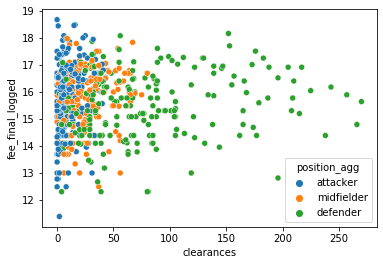

In [108]:
func.mean_by_pos(df, 'clearances')

overall correlation of blocks with fee: r=0.14, p=0.0
correlation of blocks with fee for attackers: r=0.125, p=0.045
correlation of blocks with fee for midfielders : r=0.319, p=0.0
correlation of blocks with fee for defenders: r=0.199, p=0.003


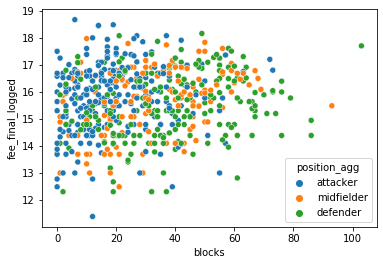

In [109]:
func.mean_by_pos(df, 'blocks')

overall correlation of interceptions with fee: r=0.135, p=0.001
correlation of interceptions with fee for attackers: r=0.104, p=0.097
correlation of interceptions with fee for midfielders : r=0.333, p=0.0
correlation of interceptions with fee for defenders: r=0.197, p=0.003


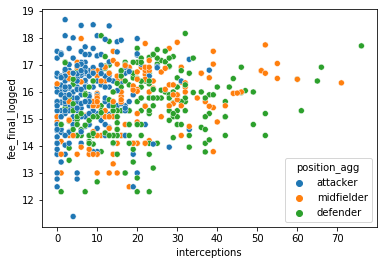

In [110]:
func.mean_by_pos(df, 'interceptions')

## Impression:
* There is the most variability for defenders in these metrics but strongest relationship with fee is for midfielders

overall correlation of pressures with fee: r=0.235, p=0.0
correlation of pressures with fee for attackers: r=0.225, p=0.0
correlation of pressures with fee for midfielders : r=0.329, p=0.0
correlation of pressures with fee for defenders: r=0.158, p=0.018


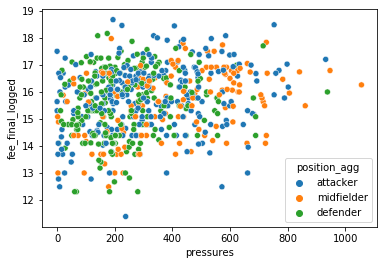

In [120]:
func.mean_by_pos(df, 'pressures')

overall correlation of pressure_regains with fee: r=0.247, p=0.0
correlation of pressure_regains with fee for attackers: r=0.226, p=0.0
correlation of pressure_regains with fee for midfielders : r=0.389, p=0.0
correlation of pressure_regains with fee for defenders: r=0.176, p=0.008


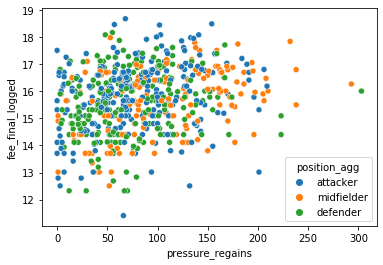

In [121]:
func.mean_by_pos(df, 'pressure_regains')

overall correlation of aerials_won with fee: r=0.155, p=0.0
correlation of aerials_won with fee for attackers: r=0.158, p=0.011
correlation of aerials_won with fee for midfielders : r=0.218, p=0.007
correlation of aerials_won with fee for defenders: r=0.183, p=0.006


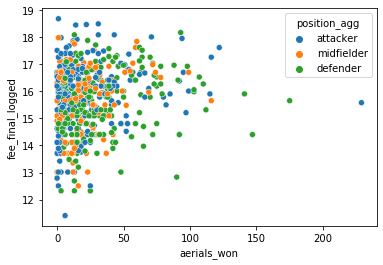

In [122]:
func.mean_by_pos(df, 'aerials_won')

overall correlation of aerials_lost with fee: r=0.172, p=0.0
correlation of aerials_lost with fee for attackers: r=0.178, p=0.004
correlation of aerials_lost with fee for midfielders : r=0.162, p=0.046
correlation of aerials_lost with fee for defenders: r=0.156, p=0.019


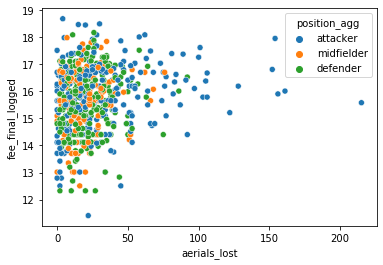

In [123]:
func.mean_by_pos(df, 'aerials_lost')

In [124]:
df['aerials_won_pct'] = df['aerials_won'] / (df['aerials_won']+df['aerials_lost']) *100

In [125]:
df['aerials_won_pct'].isna().sum()

11

In [126]:
df.fillna(value=0, inplace=True)

overall correlation of aerials_won_pct with fee: r=0.021, p=0.598
correlation of aerials_won_pct with fee for attackers: r=0.094, p=0.133
correlation of aerials_won_pct with fee for midfielders : r=0.104, p=0.203
correlation of aerials_won_pct with fee for defenders: r=0.058, p=0.386


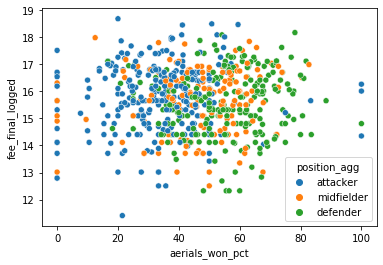

In [127]:
func.mean_by_pos(df, 'aerials_won_pct')

## Impression:
* Pressures and aerials have modest correlations at best.  Hopefully these aren't all confounded with each other otherwise my adjusted R square will be less than .2.

overall correlation of tackles with fee: r=0.165, p=0.0
correlation of tackles with fee for attackers: r=0.106, p=0.092
correlation of tackles with fee for midfielders : r=0.396, p=0.0
correlation of tackles with fee for defenders: r=0.205, p=0.002


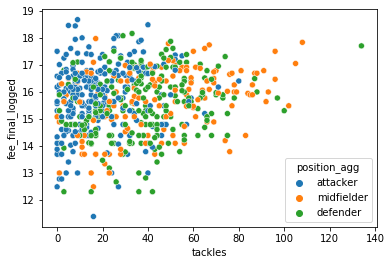

In [128]:
func.mean_by_pos(df, 'tackles')

overall correlation of tackles_won with fee: r=0.172, p=0.0
correlation of tackles_won with fee for attackers: r=0.113, p=0.071
correlation of tackles_won with fee for midfielders : r=0.403, p=0.0
correlation of tackles_won with fee for defenders: r=0.19, p=0.004


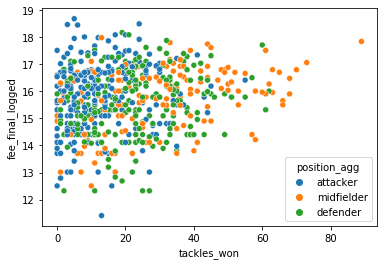

In [129]:
func.mean_by_pos(df, 'tackles_won')

In [130]:
df['tackles_won_pct'] = (df['tackles_won'] / df['tackles'])*100

In [131]:
df['tackles_won_pct'].fillna(value=0,inplace=True)

overall correlation of tackles_won_pct with fee: r=0.066, p=0.096
correlation of tackles_won_pct with fee for attackers: r=0.115, p=0.067
correlation of tackles_won_pct with fee for midfielders : r=0.087, p=0.285
correlation of tackles_won_pct with fee for defenders: r=-0.065, p=0.334


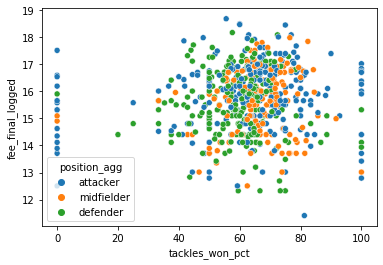

In [132]:
func.mean_by_pos(df, 'tackles_won_pct')

In [133]:
df_mins = df.loc[df['mins_num']> 900] #10 games

overall correlation of tackles_won_pct with fee: r=0.077, p=0.086
correlation of tackles_won_pct with fee for attackers: r=0.066, p=0.363
correlation of tackles_won_pct with fee for midfielders : r=0.137, p=0.123
correlation of tackles_won_pct with fee for defenders: r=-0.021, p=0.782


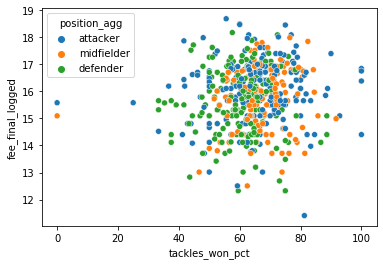

In [134]:
func.mean_by_pos(df_mins, 'tackles_won_pct')

overall correlation of aerials_won_pct with fee: r=-0.003, p=0.939
correlation of aerials_won_pct with fee for attackers: r=0.121, p=0.097
correlation of aerials_won_pct with fee for midfielders : r=0.115, p=0.199
correlation of aerials_won_pct with fee for defenders: r=0.061, p=0.413


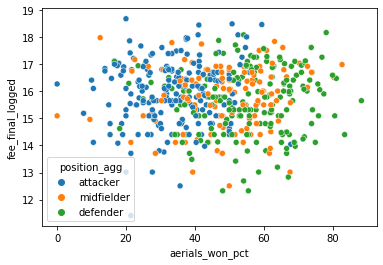

In [135]:
func.mean_by_pos(df_mins, 'aerials_won_pct')

## Impressions:
* Tackles - seem very similar to other variables.  Most important to midfielders.
* Assessing the relationship with % and % restricted to those with at least 900 mins did not show a much stronger relationship

overall correlation of tackles_def_3rd with fee: r=0.099, p=0.013
correlation of tackles_def_3rd with fee for attackers: r=0.009, p=0.89
correlation of tackles_def_3rd with fee for midfielders : r=0.358, p=0.0
correlation of tackles_def_3rd with fee for defenders: r=0.205, p=0.002


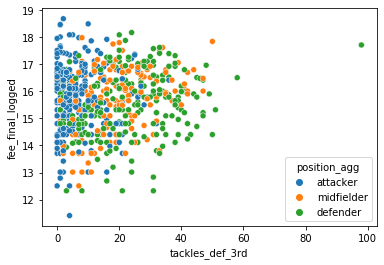

In [136]:
func.mean_by_pos(df, 'tackles_def_3rd')

overall correlation of tackles_mid_3rd with fee: r=0.183, p=0.0
correlation of tackles_mid_3rd with fee for attackers: r=0.156, p=0.013
correlation of tackles_mid_3rd with fee for midfielders : r=0.374, p=0.0
correlation of tackles_mid_3rd with fee for defenders: r=0.177, p=0.008


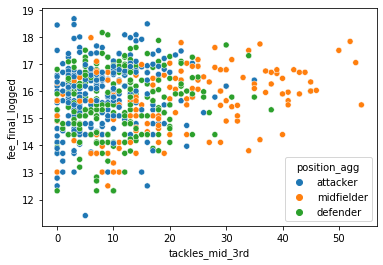

In [137]:
func.mean_by_pos(df, 'tackles_mid_3rd')

overall correlation of tackles_att_3rd with fee: r=0.18, p=0.0
correlation of tackles_att_3rd with fee for attackers: r=0.166, p=0.008
correlation of tackles_att_3rd with fee for midfielders : r=0.328, p=0.0
correlation of tackles_att_3rd with fee for defenders: r=0.059, p=0.378


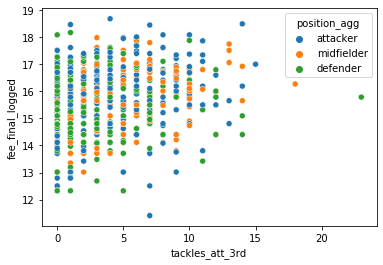

In [138]:
func.mean_by_pos(df, 'tackles_att_3rd')

## Impression:
* The story with fee only changes slightly when you consider the section of the pitch.  Still strongest relationship with midfielders, surprisingly weak association with defenders.  Increases in strength for attackers as you move further up the pitch.

## Key passing statistics
* 'passes_completed',
* 'passes_attempted',

* 'passes_completed_short' - short 5-15 yards, medium 15-30 yards, long 30+ yards
* 'passes_attempted_short',
* 'passes_into_final_third' - Completed passes that enter the 1/3 of the pitch closest to the goal. Not including set pieces
* 'passes_into_penalty_area',
* 'progressive_passes' - Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or completed passes into the penalty area. Excludes passes from the defending 40% of the pitch

* 'passes_total_dist' - Total distance, in yards, that completed passes have traveled in any direction
* 'passes_prog_dist' - Total distance, in yards, that completed passes have traveled towards the opponent's goal. Note: Passes away from opponent's goal are counted as zero progressive yards.

* 'crosses_into_penalty_area'- Completed crosses into the 18-yard box. Not including set pieces

overall correlation of passes_completed with fee: r=0.291, p=0.0
correlation of passes_completed with fee for attackers: r=0.333, p=0.0
correlation of passes_completed with fee for midfielders : r=0.504, p=0.0
correlation of passes_completed with fee for defenders: r=0.326, p=0.0


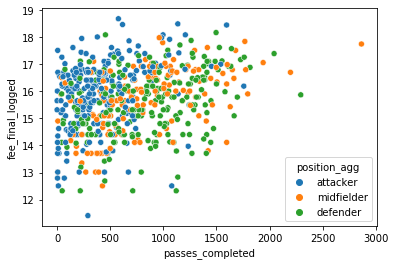

In [139]:
func.mean_by_pos(df, 'passes_completed')

overall correlation of passes_attempted with fee: r=0.286, p=0.0
correlation of passes_attempted with fee for attackers: r=0.309, p=0.0
correlation of passes_attempted with fee for midfielders : r=0.488, p=0.0
correlation of passes_attempted with fee for defenders: r=0.316, p=0.0


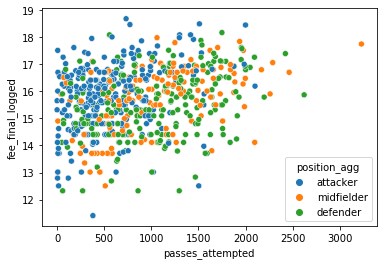

In [140]:
func.mean_by_pos(df, 'passes_attempted')

overall correlation of passes_completed_short with fee: r=0.342, p=0.0
correlation of passes_completed_short with fee for attackers: r=0.369, p=0.0
correlation of passes_completed_short with fee for midfielders : r=0.505, p=0.0
correlation of passes_completed_short with fee for defenders: r=0.309, p=0.0


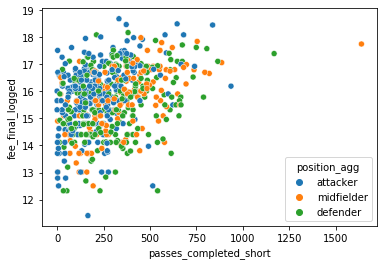

In [141]:
func.mean_by_pos(df, 'passes_completed_short')

overall correlation of passes_completed_medium with fee: r=0.234, p=0.0
correlation of passes_completed_medium with fee for attackers: r=0.298, p=0.0
correlation of passes_completed_medium with fee for midfielders : r=0.492, p=0.0
correlation of passes_completed_medium with fee for defenders: r=0.286, p=0.0


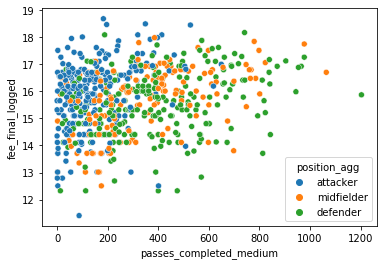

In [142]:
func.mean_by_pos(df, 'passes_completed_medium')

overall correlation of passes_completed_long with fee: r=0.169, p=0.0
correlation of passes_completed_long with fee for attackers: r=0.218, p=0.0
correlation of passes_completed_long with fee for midfielders : r=0.344, p=0.0
correlation of passes_completed_long with fee for defenders: r=0.22, p=0.001


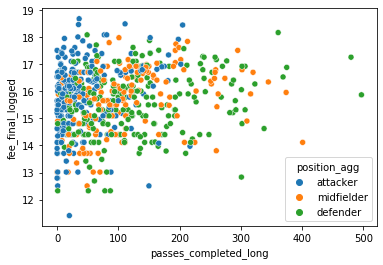

In [143]:
func.mean_by_pos(df, 'passes_completed_long')

overall correlation of passes_into_final_third with fee: r=0.272, p=0.0
correlation of passes_into_final_third with fee for attackers: r=0.278, p=0.0
correlation of passes_into_final_third with fee for midfielders : r=0.465, p=0.0
correlation of passes_into_final_third with fee for defenders: r=0.29, p=0.0


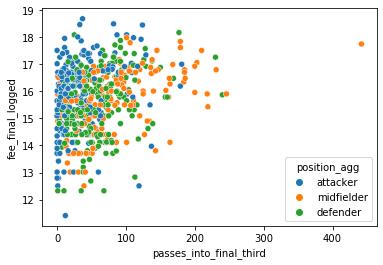

In [144]:
func.mean_by_pos(df, 'passes_into_final_third')

overall correlation of passes_into_penalty_area with fee: r=0.285, p=0.0
correlation of passes_into_penalty_area with fee for attackers: r=0.335, p=0.0
correlation of passes_into_penalty_area with fee for midfielders : r=0.354, p=0.0
correlation of passes_into_penalty_area with fee for defenders: r=0.164, p=0.014


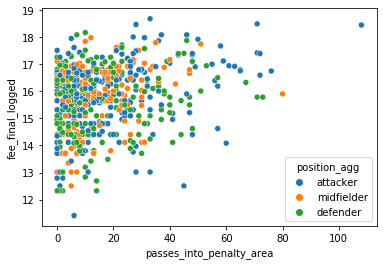

In [145]:
func.mean_by_pos(df, 'passes_into_penalty_area')

overall correlation of progressive_passes with fee: r=0.295, p=0.0
correlation of progressive_passes with fee for attackers: r=0.319, p=0.0
correlation of progressive_passes with fee for midfielders : r=0.458, p=0.0
correlation of progressive_passes with fee for defenders: r=0.263, p=0.0


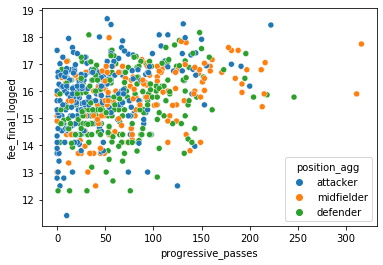

In [146]:
func.mean_by_pos(df, 'progressive_passes')

## Impression:
* Completted passes has the strongest associaton with fee.  Unsurprisingly among midfielders.  
* Some of the more advanced metrics weren't strongly linked - thought long passes would have a stronger association as would progressive passes or passes into the final third.

## Key dribbling statistics
* 'dribbles_completed' - successful dribbles
* 'dribbles' - attempts
* 'players_dribbled_past'- Number of Players Dribbled Past
* 'nutmegs' - dribbling through an opponets legs
* 'carries' -  Number of times the player controlled the ball with their feet
* 'carry_distance' - Total distance, in yards, a player moved the ball while controlling it with their feet, in any direction
* 'carry_progressive_distance' - Total distance, in yards, a player moved the ball while controlling it with their feet towards the opponent's goal

overall correlation of dribbles_completed with fee: r=0.33, p=0.0
correlation of dribbles_completed with fee for attackers: r=0.313, p=0.0
correlation of dribbles_completed with fee for midfielders : r=0.401, p=0.0
correlation of dribbles_completed with fee for defenders: r=0.286, p=0.0


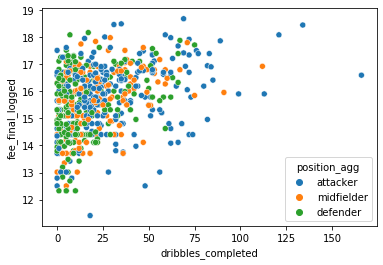

In [147]:
func.mean_by_pos(df, 'dribbles_completed')

overall correlation of dribbles with fee: r=0.317, p=0.0
correlation of dribbles with fee for attackers: r=0.303, p=0.0
correlation of dribbles with fee for midfielders : r=0.374, p=0.0
correlation of dribbles with fee for defenders: r=0.282, p=0.0


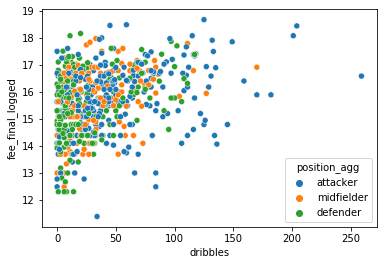

In [148]:
func.mean_by_pos(df, 'dribbles')

overall correlation of players_dribbled_past with fee: r=0.328, p=0.0
correlation of players_dribbled_past with fee for attackers: r=0.308, p=0.0
correlation of players_dribbled_past with fee for midfielders : r=0.401, p=0.0
correlation of players_dribbled_past with fee for defenders: r=0.288, p=0.0


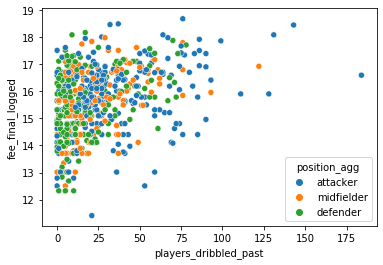

In [149]:
func.mean_by_pos(df, 'players_dribbled_past')

overall correlation of nutmegs with fee: r=0.23, p=0.0
correlation of nutmegs with fee for attackers: r=0.254, p=0.0
correlation of nutmegs with fee for midfielders : r=0.226, p=0.005
correlation of nutmegs with fee for defenders: r=0.163, p=0.015


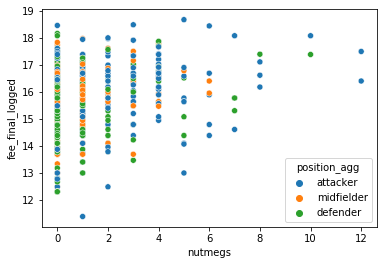

In [150]:
func.mean_by_pos(df, 'nutmegs')

overall correlation of carries with fee: r=0.361, p=0.0
correlation of carries with fee for attackers: r=0.349, p=0.0
correlation of carries with fee for midfielders : r=0.527, p=0.0
correlation of carries with fee for defenders: r=0.356, p=0.0


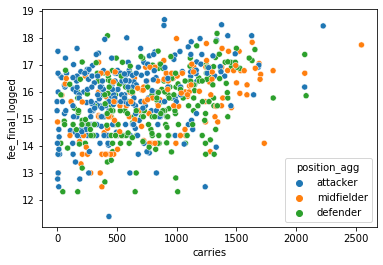

In [151]:
func.mean_by_pos(df, 'carries')

overall correlation of carry_distance with fee: r=0.367, p=0.0
correlation of carry_distance with fee for attackers: r=0.319, p=0.0
correlation of carry_distance with fee for midfielders : r=0.521, p=0.0
correlation of carry_distance with fee for defenders: r=0.386, p=0.0


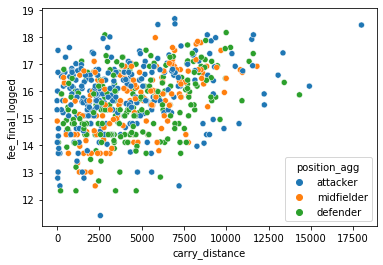

In [152]:
func.mean_by_pos(df, 'carry_distance')

overall correlation of carry_progressive_distance with fee: r=0.357, p=0.0
correlation of carry_progressive_distance with fee for attackers: r=0.306, p=0.0
correlation of carry_progressive_distance with fee for midfielders : r=0.521, p=0.0
correlation of carry_progressive_distance with fee for defenders: r=0.389, p=0.0


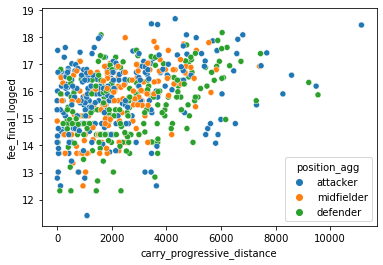

In [153]:
func.mean_by_pos(df, 'carry_progressive_distance')

## Impression:
* Various dribbles and carry metrics seem like substitutes.  
* Can't use nutmegs

## Key management statistics and errors 
 'games',
 'games_start',
 'yellow_cards',
 'red_cards',
 'full_90s_played',
 'passes_left_foot',
 'passes_right_foot',
 
 'errors' - Mistakes leading to an opponent's shot
 'miscontrols'- Number of times a player failed when attempting to gain control of a ball
 'dispossessed' - Number of times a player loses control of the ball after being tackled by an opposing player. Does not include attempted dribbles
 
 

overall correlation of games with fee: r=0.301, p=0.0
correlation of games with fee for attackers: r=0.306, p=0.0
correlation of games with fee for midfielders : r=0.373, p=0.0
correlation of games with fee for defenders: r=0.242, p=0.0


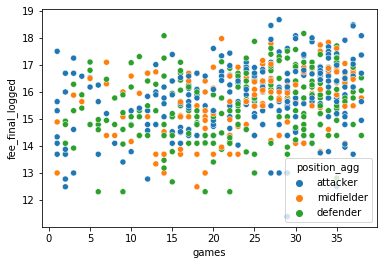

In [154]:
func.mean_by_pos(df, 'games')

overall correlation of games_start with fee: r=0.281, p=0.0
correlation of games_start with fee for attackers: r=0.304, p=0.0
correlation of games_start with fee for midfielders : r=0.386, p=0.0
correlation of games_start with fee for defenders: r=0.238, p=0.0


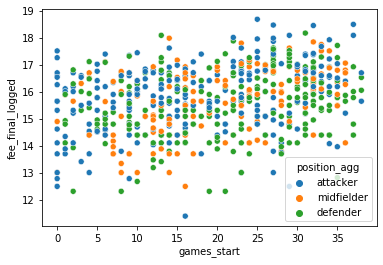

In [155]:
func.mean_by_pos(df, 'games_start')

overall correlation of full_90s_played with fee: r=0.292, p=0.0
correlation of full_90s_played with fee for attackers: r=0.321, p=0.0
correlation of full_90s_played with fee for midfielders : r=0.392, p=0.0
correlation of full_90s_played with fee for defenders: r=0.246, p=0.0


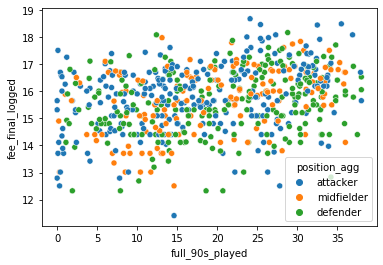

In [156]:
func.mean_by_pos(df, 'full_90s_played')

overall correlation of yellow_cards with fee: r=0.058, p=0.145
correlation of yellow_cards with fee for attackers: r=0.089, p=0.154
correlation of yellow_cards with fee for midfielders : r=0.195, p=0.016
correlation of yellow_cards with fee for defenders: r=0.003, p=0.97


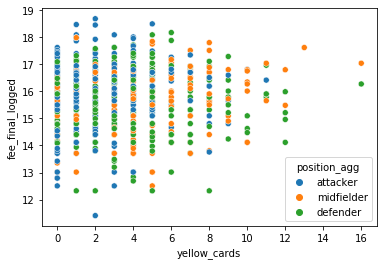

In [157]:
func.mean_by_pos(df, 'yellow_cards')

overall correlation of red_cards with fee: r=-0.089, p=0.025
correlation of red_cards with fee for attackers: r=-0.085, p=0.178
correlation of red_cards with fee for midfielders : r=-0.138, p=0.09
correlation of red_cards with fee for defenders: r=-0.042, p=0.528


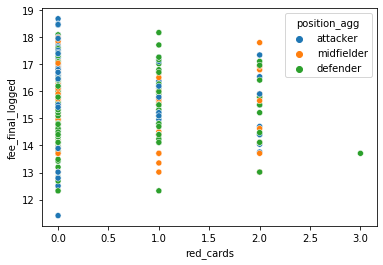

In [158]:
func.mean_by_pos(df, 'red_cards')

overall correlation of passes_left_foot with fee: r=0.208, p=0.0
correlation of passes_left_foot with fee for attackers: r=0.262, p=0.0
correlation of passes_left_foot with fee for midfielders : r=0.305, p=0.0
correlation of passes_left_foot with fee for defenders: r=0.173, p=0.01


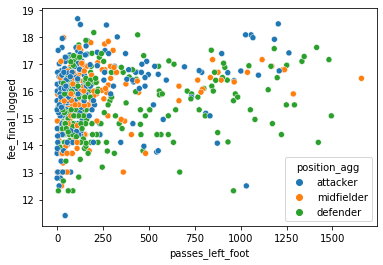

In [159]:
func.mean_by_pos(df, 'passes_left_foot')

overall correlation of passes_right_foot with fee: r=0.186, p=0.0
correlation of passes_right_foot with fee for attackers: r=0.17, p=0.006
correlation of passes_right_foot with fee for midfielders : r=0.336, p=0.0
correlation of passes_right_foot with fee for defenders: r=0.194, p=0.004


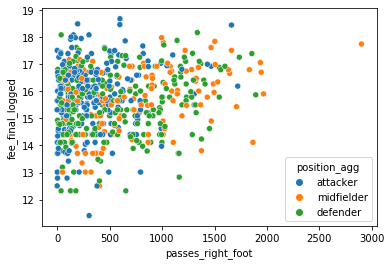

In [160]:
func.mean_by_pos(df, 'passes_right_foot')

## Impressions
* Games, starts, and full90s are roughly equivalent.  Probably only need one.
* Cards don't have much of an association with transfer fee.  More important for reccomendations system. 
* footedness was a bit of stretch.  Might assume left footed players are at a bit of a premium.  More important for reccomendations system. 

overall correlation of errors with fee: r=0.031, p=0.431
correlation of errors with fee for attackers: r=0.028, p=0.653
correlation of errors with fee for midfielders : r=0.04, p=0.621
correlation of errors with fee for defenders: r=0.124, p=0.065


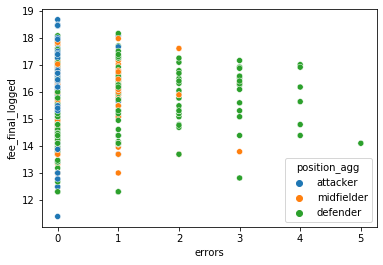

In [161]:
func.mean_by_pos(df, 'errors')

overall correlation of miscontrols with fee: r=0.269, p=0.0
correlation of miscontrols with fee for attackers: r=0.294, p=0.0
correlation of miscontrols with fee for midfielders : r=0.323, p=0.0
correlation of miscontrols with fee for defenders: r=0.224, p=0.001


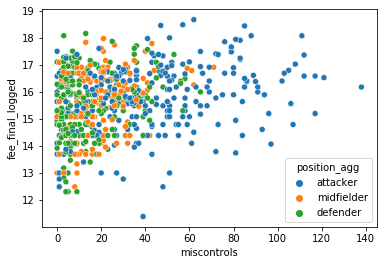

In [162]:
func.mean_by_pos(df, 'miscontrols')

overall correlation of dispossessed with fee: r=0.277, p=0.0
correlation of dispossessed with fee for attackers: r=0.293, p=0.0
correlation of dispossessed with fee for midfielders : r=0.279, p=0.001
correlation of dispossessed with fee for defenders: r=0.237, p=0.0


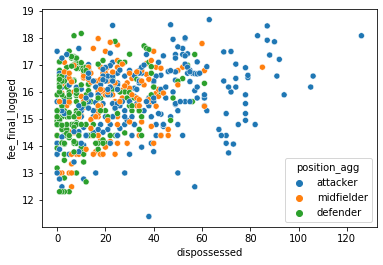

In [163]:
func.mean_by_pos(df, 'dispossessed')

## Impression: 
* Surprised by these positive correlations.  Assuming there is negative confounding by full90s.

In [164]:
list(df.columns)

['player',
 'age_x',
 'nationality',
 'position',
 'selling_club',
 'previous_league',
 'est_market_value',
 'fee',
 'buying_club',
 'window',
 'transfer_year',
 'buying_league',
 'loan',
 'free',
 'buying_top_5',
 'currency',
 'multiplier',
 'fee_numerical',
 'mult_num',
 'fee_final',
 'index_year',
 'index_name',
 'birth_year',
 'age_y',
 'games',
 'games_start',
 'goals',
 'assists',
 'pens_successful',
 'pens_attempts',
 'yellow_cards',
 'red_cards',
 'xg',
 'npxp',
 'xa',
 'full_90s_played',
 'shots_total',
 'shots_on_target',
 'npxg',
 'passes_completed',
 'passes_attempted',
 'passes_total_dist',
 'passes_prog_dist',
 'passes_completed_short',
 'passes_attempted_short',
 'passes_completed_medium',
 'passes_attempted_medium',
 'passes_completed_long',
 'passes_attempted_long',
 'xa_net',
 'assisted_shots',
 'passes_into_final_third',
 'passes_into_penalty_area',
 'crosses_into_penalty_area',
 'progressive_passes',
 'sca',
 'sca_passes_live',
 'sca_passes_dead',
 'sca_dribbles',
 

In [165]:
df.to_csv('data/df_with_engineered_features.csv')

## Performance Metrics and Transfer Fee Figure

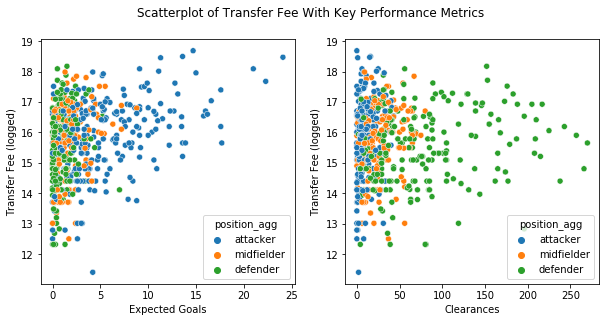

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(10,4.5))
sns.scatterplot(ax=axes[0], data=df, x='xg', y='fee_final_logged', hue='position_agg')
sns.scatterplot(ax=axes[1], data=df, x='clearances', y='fee_final_logged', hue='position_agg')

fig.suptitle('Scatterplot of Transfer Fee With Key Performance Metrics')
axes[0].set_ylabel('Transfer Fee (logged)')
axes[0].set_xlabel('Expected Goals');
axes[1].set_ylabel('Transfer Fee (logged)')
axes[1].set_xlabel('Clearances');
plt.savefig('images/Scatter_trans_fee_xg_clearances.png')